# Develop a convolutional neural network (CNN) model to classify handwritten digits using the MNIST dataset. The goal is to train a model that accurately identifies digits (0-9) from images.

## Imports

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## Utils

In [13]:
plt.style.use("dark_background")

def plot_img(img, title=None, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.title(title, fontsize=20)
    plt.axis('off')

## Data

### Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

### Normalize the image data

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Visualize the data

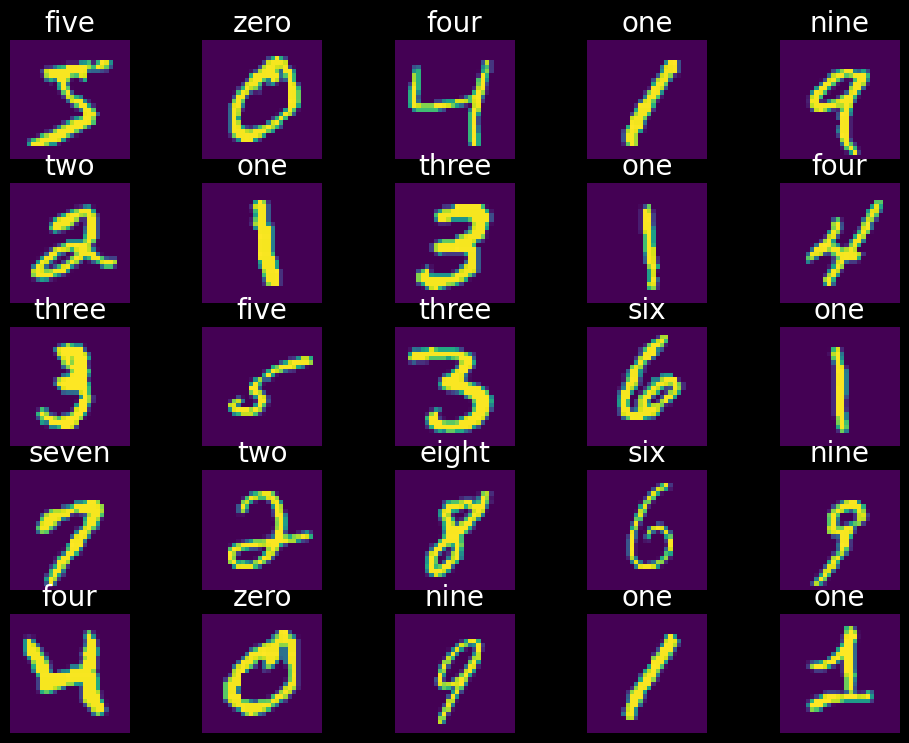

In [14]:
sample = X_train[:25]

plt.figure(figsize=(12, 9))
for _ in range(25):
    plt.subplot(5, 5, _+1)
    plot_img(sample[_], title=f"{class_names[y_train[_]]}")

## Model

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)                1

### Compile model with loss and optimizer

In [17]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model

In [18]:
train_results = model.fit(
    x=X_train,
    y=y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 353s 375ms/step - loss: 0.1230 - accuracy: 0.9627 - val_loss: 0.0501 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 290s 309ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 3/5
938/938 [==============================] - 290s 309ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0366 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 305s 326ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0447 - val_accuracy: 0.9879
Epoch 5/5
938/938 [==============================] - 302s 322ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0314 - val_accuracy: 0.9905


## Make Predictions

In [19]:
def predict(img):
    img = tf.expand_dims(img, axis=0)
    scores = model.predict(img)
    pred = scores.argmax()
    return pred

1/1 [==============================] - 0s 40ms/step


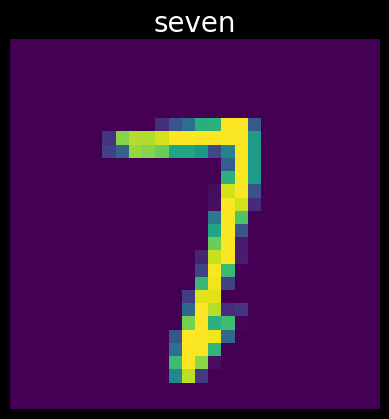

In [21]:
sample = X_test[234]
class_id = predict(sample)
plot_img(sample, title=f"{class_names[class_id]}")